In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import duckdb

from compstat_research.config import EXTERNAL_DATA_DIR, MPLSTYLE_DIR

plt.style.use(MPLSTYLE_DIR / "iragca_cmr10.mplstyle")


In [20]:
gtd_path =  EXTERNAL_DATA_DIR / "kaggle" / "gtd"
gtd = pl.read_csv(
    gtd_path / "globalterrorismdb_0522dist.csv",
    encoding="utf8",
    infer_schema_length=100000
    )

In [17]:
gtd

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,…,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
i64,i64,i64,i64,str,i64,str,i64,str,i64,str,str,str,f64,f64,i64,i64,str,str,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,str,i64,str,i64,str,i64,str,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,str,i64,i64,i64,f64,i64,str,str,i64,f64,f64,f64,i64,str,i64,str,i64,str,str,str,str,str,i64,i64,i64,i64,str
197000000001,1970,7,2,null,0,null,58,"""Dominican Republic""",2,"""Central America & Caribbean""","""National""","""Santo Domingo""",18.456792,-69.951164,1,0,null,null,1,1,1,0,null,null,0,1,0,1,"""Assassination""",null,null,null,null,14,"""Private Citizens & Property""",68,…,1,null,null,0,null,null,0,null,null,null,null,0,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,"""PGIS""",0,0,0,0,null
197000000002,1970,0,0,null,0,null,130,"""Mexico""",1,"""North America""","""Federal""","""Mexico city""",19.371887,-99.086624,1,0,null,null,1,1,1,0,null,null,0,1,0,6,"""Hostage Taking (Kidnapping)""",null,null,null,null,7,"""Government (Diplomatic)""",45,…,0,null,null,0,null,null,0,null,null,null,null,1,1,0,null,null,null,"""Mexico""",1,800000.0,null,null,null,null,null,null,null,null,null,null,null,"""PGIS""",0,1,1,1,null
197001000001,1970,1,0,null,0,null,160,"""Philippines""",5,"""Southeast Asia""","""Tarlac""","""Unknown""",15.478598,120.599741,4,0,null,null,1,1,1,0,null,null,0,1,0,1,"""Assassination""",null,null,null,null,10,"""Journalists & Media""",54,…,1,null,null,0,null,null,0,null,null,null,null,0,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,"""PGIS""",-9,-9,1,1,null
197001000002,1970,1,0,null,0,null,78,"""Greece""",8,"""Western Europe""","""Attica""","""Athens""",37.99749,23.762728,1,0,null,null,1,1,1,0,null,null,0,1,0,3,"""Bombing/Explosion""",null,null,null,null,7,"""Government (Diplomatic)""",46,…,null,null,null,null,null,null,1,null,null,null,null,0,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,"""PGIS""",-9,-9,1,1,null
197001000003,1970,1,0,null,0,null,101,"""Japan""",4,"""East Asia""","""Fukouka""","""Fukouka""",33.580412,130.396361,1,0,null,null,1,1,1,-9,null,null,0,1,0,7,"""Facility/Infrastructure Attack""",null,null,null,null,7,"""Government (Diplomatic)""",46,…,null,null,null,null,null,null,1,null,null,null,null,0,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,"""PGIS""",-9,-9,1,1,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
202012310015,2020,12,31,"""12/31/2020""",0,null,228,"""Yemen""",10,"""Middle East & North Africa""","""Al Hudaydah""","""Sabaa""",15.305307,43.01949,2,0,null,"""12/31/2020: Assailants fired m…",1,1,1,0,null,null,0,1,0,3,"""Bombing/Explosion""",null,null,null,null,14,"""Private Citizens & Property""",76,…,null,0,0,null,0,0,1,3,"""Minor (likely < $1 million)""",-99.0,"""Houses and buildings damaged""",0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""""Al Houthi militia escalated i…",null,null,"""START Primary Collection""",0,0,0,0,null
202012310016,2020,12,31,"""12/31/2020""",0,null,228,"""Yemen""",10,"""Middle East & North Africa""","""Al Hudaydah""","""Beit Maghari""",1

In [ ]:
conn = duckdb.connect(gtd_path / "gtd.duckdb")

conn.sql("CREATE OR REPLACE TABLE gtd AS SELECT * FROM gtd")

gtd = conn.sql("SELECT * FROM gtd").pl()

In [31]:
gtd.describe().write_csv(gtd_path / "gtd_describe.csv")


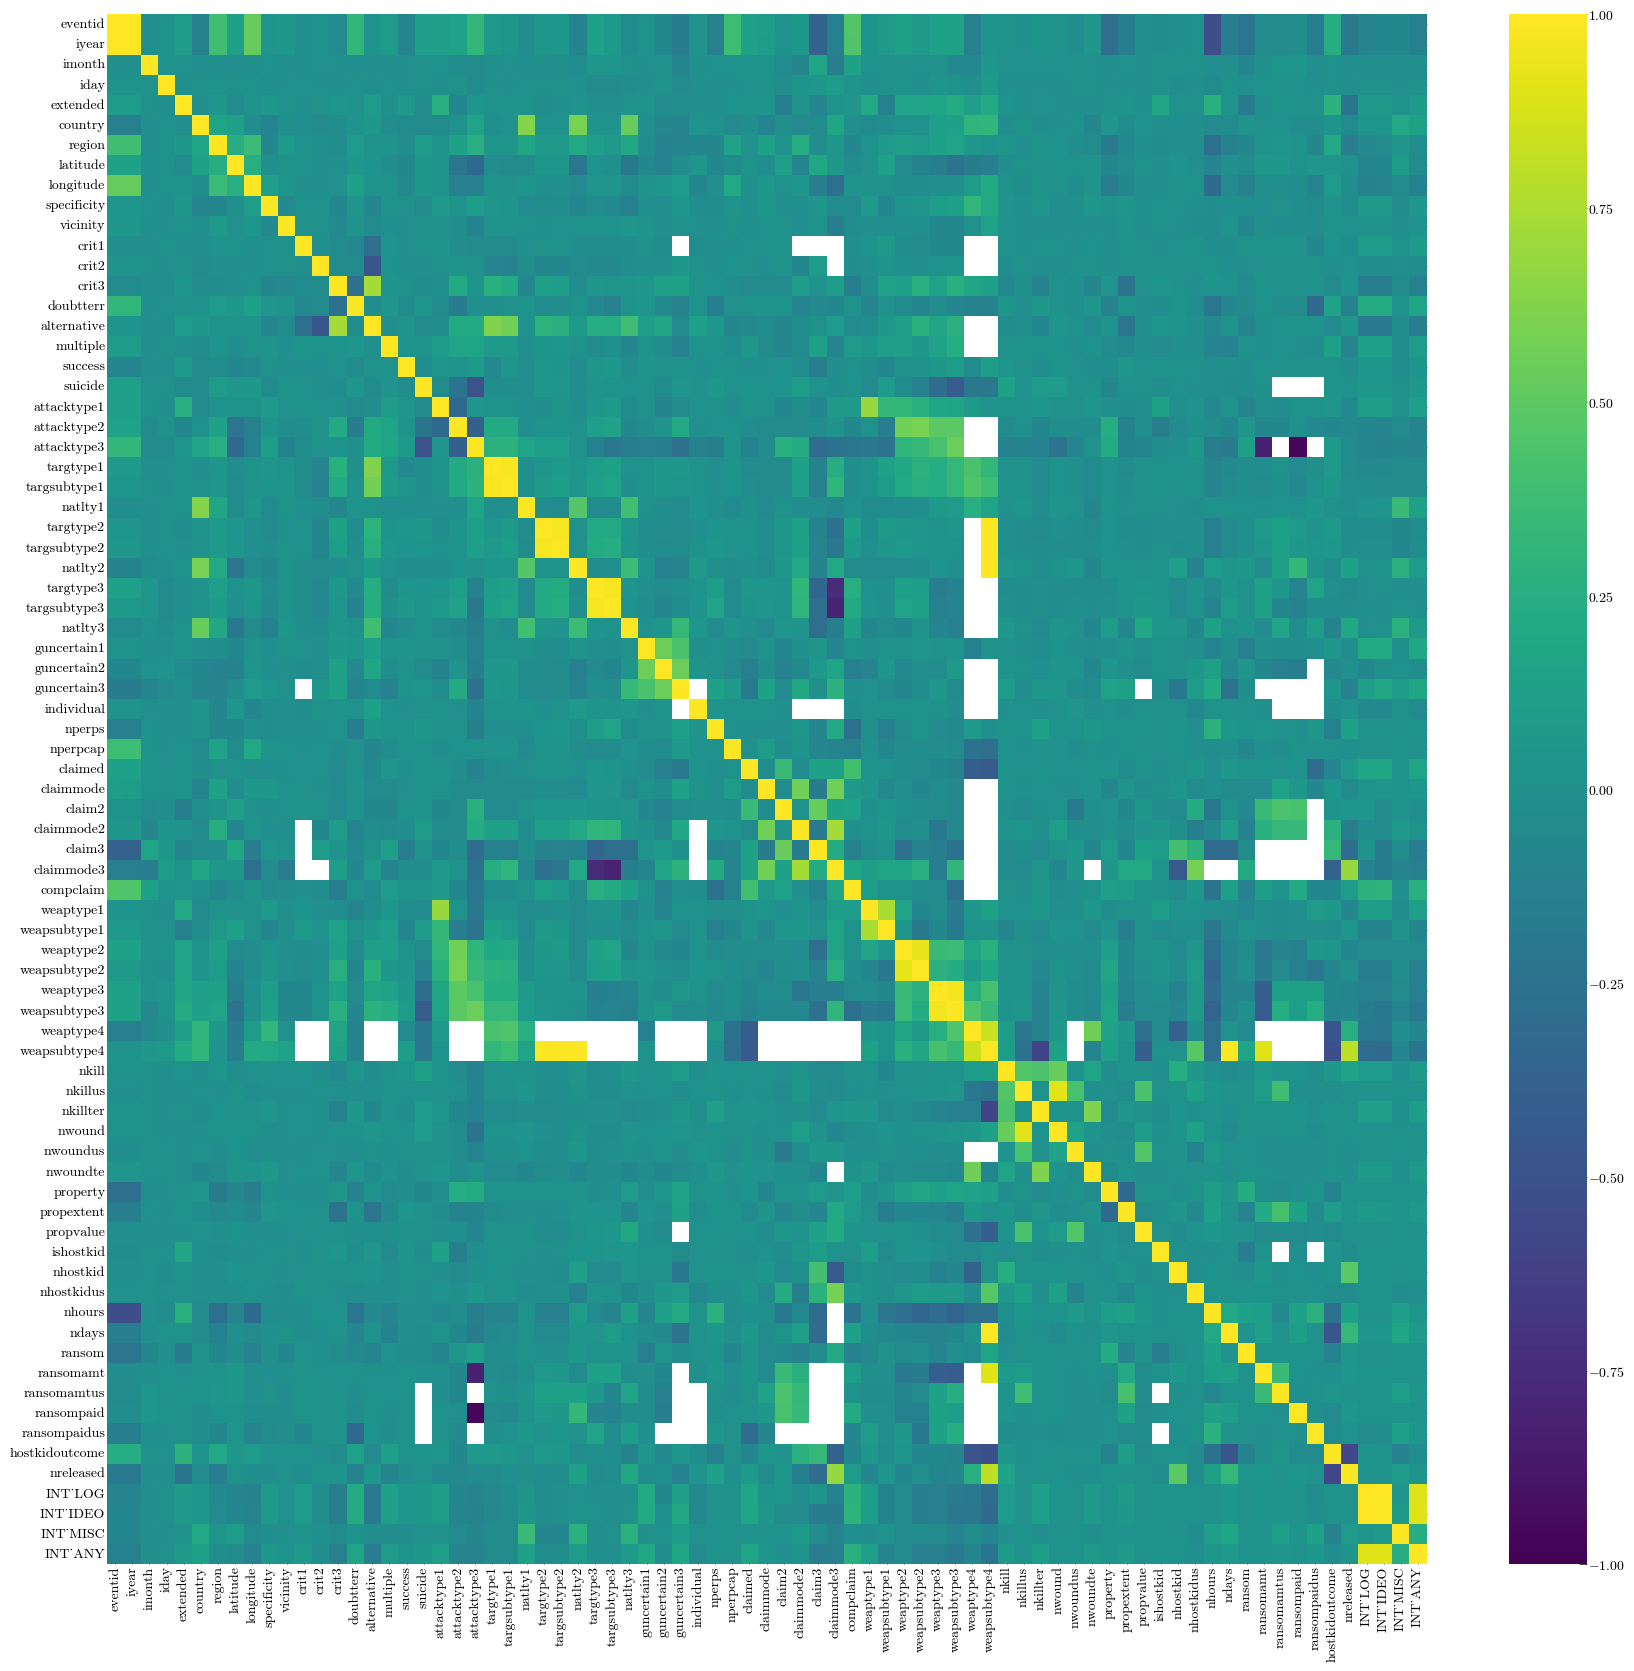

In [49]:
plt.figure(figsize=(20, 20))
sns.heatmap(gtd.to_pandas().corr(numeric_only=True), cmap="viridis", vmin=-1, vmax=1)
plt.grid()
plt.savefig(gtd_path / "gtd_corr.png", dpi=300)


<Axes: xlabel='iyear', ylabel='Count'>

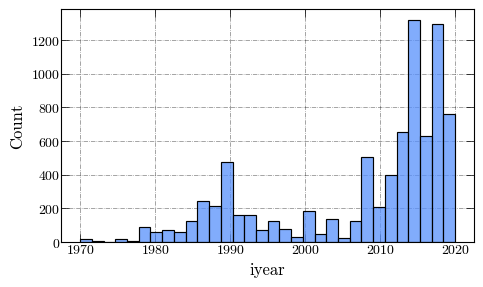

In [32]:
sns.histplot(gtd.filter(pl.col("country_txt") == "Philippines"), x="iyear")

(1.0, 12.0)

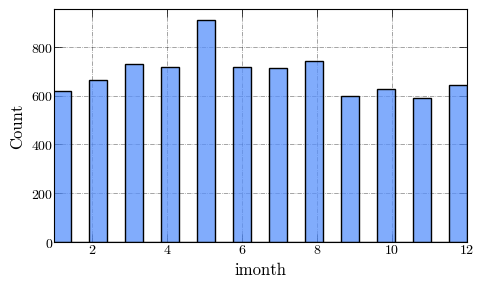

In [35]:
sns.histplot(gtd.filter(pl.col("country_txt") == "Philippines"), x="imonth")
plt.xlim(1, 12)


(1.0, 31.0)

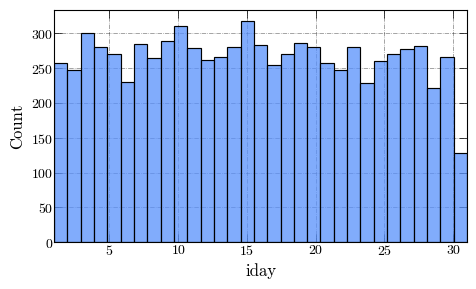

In [42]:
sns.histplot(gtd.filter(pl.col("country_txt") == "Philippines"), x="iday", bins=32)
plt.xlim(1, 31)
